!!! Open files !!!
!!! Open: J:/MDLS_OBS_OHC/myEN4_198001_202012_tsh.nc !!!
9.969209968386869e+36
-8440119958.45915
!!! linregress !!!
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


RuntimeError: No active exception to reraise

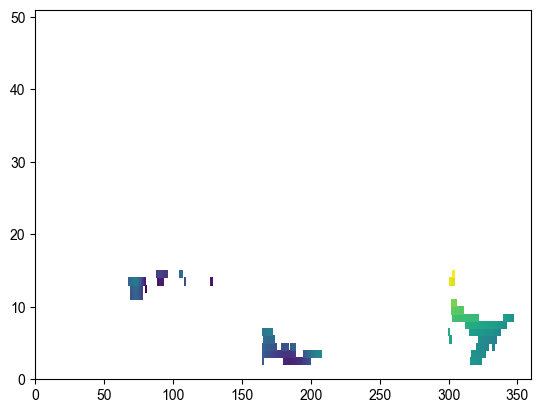

In [3]:
import sys
sys.path.append('C:/Users/shjo/Bridge/JNUpack/SO/libs/')
import matplotlib as mpl
# mpl.use('agg')
import os
import numpy as np
import xarray as xr
from myTrend import myfitting2d_sttcs
from myPlot import  figmaster,myClrbr
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pthMO='J:/MDLS_OBS_OHC/'

wpth='C:/Users/shjo/OneDrive/mySO/trend_ohc/'
t_rng=[1980, 2020]

### Preparation ============================================================

myMDOB=[pthMO+i for i in os.listdir(pthMO) if i.endswith('.nc')]

myDATA=myMDOB

### Read myDATA =============================================================
print('!!! Open files !!!')
lat_rng=[-80,-30] ; time_rng=[str(t_rng[0])+'-01',str(t_rng[-1])+'-12']
for i in [myDATA[1]]: 
    print('!!! Open: '+i+' !!!')
    tmp=xr.open_dataset(i)

    mySST = tmp.OHC700.loc[dict(lat=slice(lat_rng[0],lat_rng[-1])\
        ,time=slice(time_rng[0],time_rng[-1]))]
    print(np.nanmax(mySST))
    print(np.nanmin(mySST))

    mySST=mySST.where(mySST<10**30)
    lonR,latR=mySST.lon.values,mySST.lat.values
    lonR_m,latR_m=np.meshgrid(lonR,latR)
    time=mySST.time.values
    dta_nm=i.split('/')[-1][2:-3].split('_')[0]+' OHC700 '+'trend '+\
        str(time[0])[:4]+' '+str(time[-1])[:4]

    ### SST Coef =============================================================
    print('!!! linregress !!!')
    slope,intercept,r_value,p_value,std_err,smask=myfitting2d_sttcs(mySST,threshold=0.05)
    CoefD=slope*12*10 # Decadal^-1
    print(CoefD); 
    plt.pcolor(CoefD); raise
    ### Figure configs =======================================================
    myN=16
    sstTlim=[-0.5,0.5]
    CMAP,mylevel=myClrbr('myblc2',sstTlim,myN)

    CoefD[CoefD<sstTlim[0]]=sstTlim[0]
    CoefD[CoefD>sstTlim[-1]]=sstTlim[-1]

    mySetting={'title_loc':'right',
            'wpth':wpth}

    mySetting={
        'figsize': '',
        'mylabel': '',
        'Label_size':18,
        'title_loc':'right',
        'fontParams':'Arial',
        'wpth':wpth}

    ### Figure ==============================================================
    print('!!!   figure   !!!')
    F=figmaster(mySetting)
    F.myCrtpy_sph2(latR_m,lonR_m,CoefD,smask,CMAP,mylevel,dta_nm)
